In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'D2coding'

In [3]:
todari = pd.read_csv('D:\FILE\\totalData_List.csv').sort_values('일시',ascending=False).reset_index(drop=True)
todari

,일시,평균기온(℃),최고기온(℃),최저기온(℃),pm25,pm10,o3,no2,so2,co,평균습도(%rh),강수량(mm),평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg)
0,2024-06-14,26.3,33.0,21.4,82.0,35.0,17.0,13.0,4.0,3.0,56.0,0.0,2.3,5.9,290.0
1,2024-06-13,26.4,32.8,20.0,73.0,43.0,76.0,22.0,6.0,4.0,51.4,0.0,1.8,4.3,250.0
2,2024-06-12,24.8,31.8,19.2,69.0,37.0,65.0,22.0,4.0,4.0,60.8,0.0,2.1,4.7,290.0
3,2024-06-11,25.4,31.6,21.7,125.0,36.0,84.0,18.0,4.0,4.0,62.4,0.0,2.4,4.7,250.0
4,2024-06-10,24.7,31.1,19.0,100.0,61.0,92.0,14.0,4.0,6.0,66.3,0.0,2.2,4.6,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502,2014-08-06,24.4,26.2,22.5,100.0,49.0,37.0,39.0,7.0,5.0,92.4,10.5,2.2,4.9,230.0
3503,2014-08-05,26.6,29.2,25.0,89.0,47.0,36.0,27.0,7.0,5.0,87.5,0.0,3.2,4.8,230.0
3504,2014-08-04,26.4,29.6,24.7,27.0,10.0,19.0,23.0,6.0,4.0,93.0,6.5,2.1,4.7,230.0
3505,2014-08-03,26.5,30.5,24.1,21.0,9.0,23.0,13.0,6.0,2.0,87.6,13.0,4.2,7.0,70.0


In [4]:
# 풍향 데이터 추출
wind_direction = todari['최대풍속풍향(deg)']

# 사인 및 코사인 변환
todari['Wind_X'] = np.cos(wind_direction * 2 * np.pi / 360)
todari['Wind_Y'] = np.sin(wind_direction * 2 * np.pi / 360)

# 기존 최대풍속풍향(deg) 컬럼 삭제
todari.drop(columns=['최대풍속풍향(deg)'], inplace=True)



In [5]:
todari.columns.to_list()
data = todari.copy()

pm25 평균 제곱 오차: 714.5022355589006
pm25 결정 계수 (R^2): 0.38529919890150766
pm10 평균 제곱 오차: 132.3541061365196
pm10 결정 계수 (R^2): 0.6434572263326181


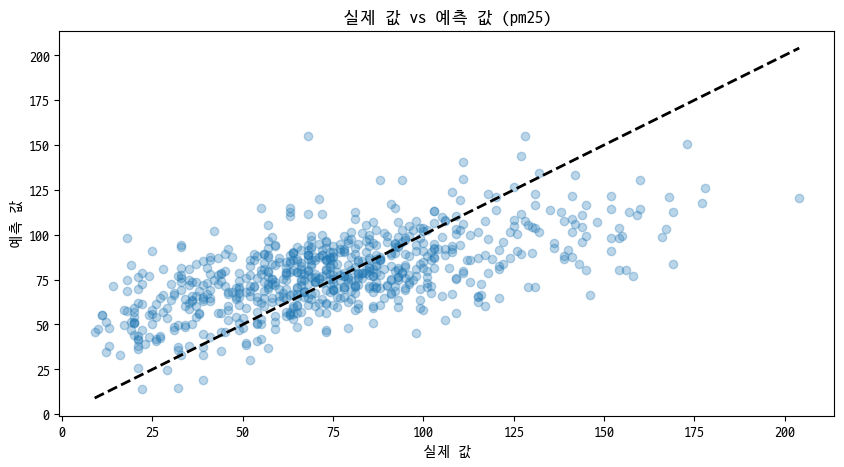

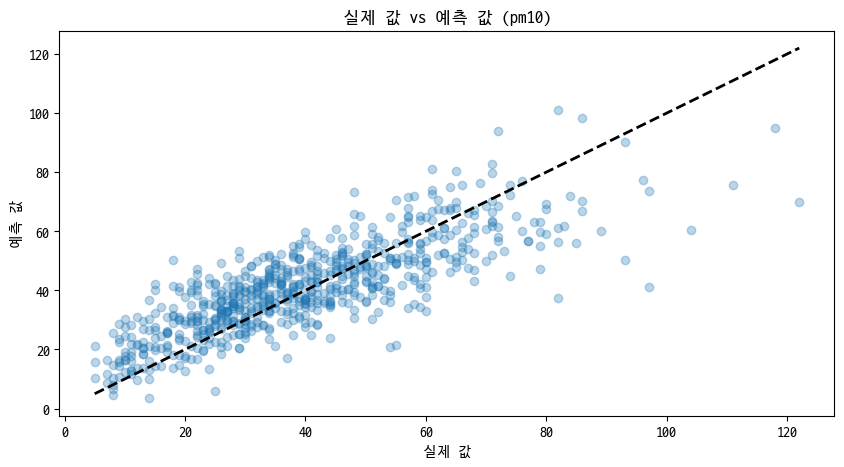

In [6]:
# 독립 변수와 종속 변수 분리
X = data[['평균기온(℃)', '최고기온(℃)', '최저기온(℃)', 'o3', 'no2', 'so2', 'co', '평균습도(%rh)', '강수량(mm)', '평균풍속(m/s)', '최대풍속(m/s)', 'Wind_X', 'Wind_Y']]
y_pm25 = data['pm25']
y_pm10 = data['pm10']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_pm25_train, y_pm25_test, y_pm10_train, y_pm10_test = train_test_split(X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# pm25 선형회귀 모델 학습
model_pm25 = LinearRegression()
model_pm25.fit(X_train, y_pm25_train)

# pm25 예측
y_pm25_pred = model_pm25.predict(X_test)

# pm25 평가
mse_pm25 = mean_squared_error(y_pm25_test, y_pm25_pred)
r2_pm25 = r2_score(y_pm25_test, y_pm25_pred)

print(f'pm25 평균 제곱 오차: {mse_pm25}')
print(f'pm25 결정 계수 (R^2): {r2_pm25}')

# pm10 선형회귀 모델 학습
model_pm10 = LinearRegression()
model_pm10.fit(X_train, y_pm10_train)

# pm10 예측
y_pm10_pred = model_pm10.predict(X_test)

# pm10 평가
mse_pm10 = mean_squared_error(y_pm10_test, y_pm10_pred)
r2_pm10 = r2_score(y_pm10_test, y_pm10_pred)

print(f'pm10 평균 제곱 오차: {mse_pm10}')
print(f'pm10 결정 계수 (R^2): {r2_pm10}')

# pm25 결과 시각화
plt.figure(figsize=(10, 5))
plt.scatter(y_pm25_test, y_pm25_pred, alpha=0.3)
plt.plot([y_pm25_test.min(), y_pm25_test.max()], [y_pm25_test.min(), y_pm25_test.max()], 'k--', lw=2)
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값 (pm25)')
plt.show()

# pm10 결과 시각화
plt.figure(figsize=(10, 5))
plt.scatter(y_pm10_test, y_pm10_pred, alpha=0.3)
plt.plot([y_pm10_test.min(), y_pm10_test.max()], [y_pm10_test.min(), y_pm10_test.max()], 'k--', lw=2)
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값 (pm10)')
plt.show()


In [7]:
# '일시' 열을 날짜 형식으로 변환
data['일시'] = pd.to_datetime(data['일시'])

# 상관계수 계산
correlation_matrix = data.corr()

# pm25와 다른 컬럼의 상관계수
pm25_correlation = correlation_matrix['pm25'].drop('pm25')
pd.DataFrame(pm25_correlation)





,pm25
일시,-0.193957
평균기온(℃),-0.208555
최고기온(℃),-0.170517
최저기온(℃),-0.234943
pm10,0.540564
o3,-0.025540
no2,0.428261
so2,0.347081
co,0.495582
평균습도(%rh),-0.119303


In [8]:
# pm10과 다른 컬럼의 상관계수
pm10_correlation = correlation_matrix['pm10'].drop('pm10')
pd.DataFrame(pm10_correlation)



,pm10
일시,-0.186789
평균기온(℃),-0.253283
최고기온(℃),-0.213918
최저기온(℃),-0.283467
pm25,0.540564
o3,0.023866
no2,0.498347
so2,0.415563
co,0.542467
평균습도(%rh),-0.203305


C:\Users\human\AppData\Local\Temp\ipykernel_22292\896046422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pm25_correlation.index, y=pm25_correlation.values, palette='coolwarm')


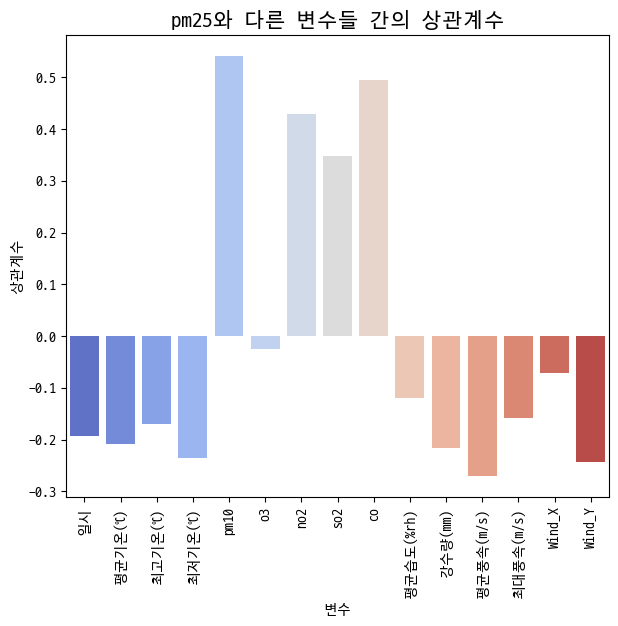

C:\Users\human\AppData\Local\Temp\ipykernel_22292\896046422.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pm10_correlation.index, y=pm10_correlation.values, palette='coolwarm')


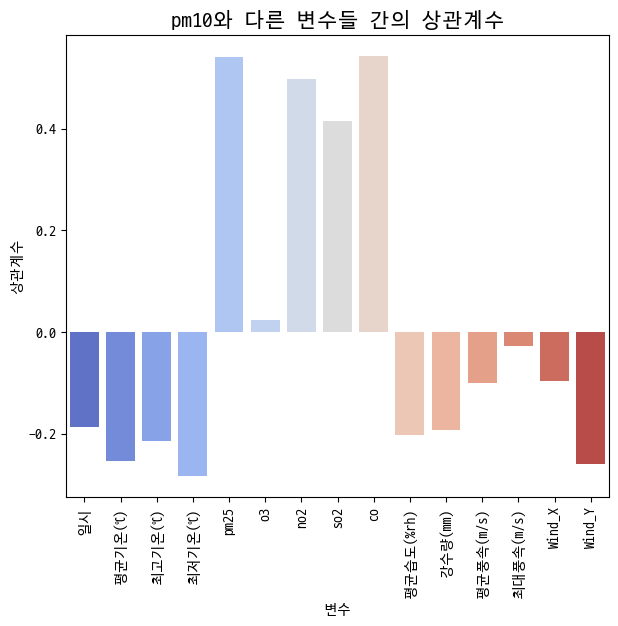

In [9]:
# pm25 상관계수 시각화
plt.figure(figsize=(7, 6))
sns.barplot(x=pm25_correlation.index, y=pm25_correlation.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('pm25와 다른 변수들 간의 상관계수', fontsize=15)
plt.xlabel('변수')
plt.ylabel('상관계수')
plt.show()

# pm10 상관계수 시각화
plt.figure(figsize=(7, 6))
sns.barplot(x=pm10_correlation.index, y=pm10_correlation.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('pm10와 다른 변수들 간의 상관계수', fontsize=15)
plt.xlabel('변수')
plt.ylabel('상관계수')
plt.show()
